In [79]:
import pandas as pd   #step 1: load the dataset
import numpy as np
import matplotlib.pyplot as plt


In [80]:
titanic_data=pd.read_csv('/content/drive/MyDrive/Diksha/train.csv')

In [81]:
titanic_data.head(5)   #get info about the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
titanic_data.shape

(891, 12)

In [84]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
missing_values=titanic_data.isnull().sum()  #check for missing values
print('The missing values of the attributes ')
missing_values

The missing values of the attributes 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
titanic_data=titanic_data.drop(columns='Cabin',axis=1) #drop the 'Cabin' column from the dataFrame

In [100]:
#replacing the missing value in 'Age' column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [101]:
#finding the mode value of 'Embarked' column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [102]:
print(titanic_data['Embarked'].mode()[0])

S


In [103]:
#replace
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [104]:
missing_values=titanic_data.isnull().sum()
print('The missing values of the attributes ')
missing_values

The missing values of the attributes 


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [105]:
#do statistical survey here
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

<ipython-input-107-a2f872ab226f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = titanic_data.corr()


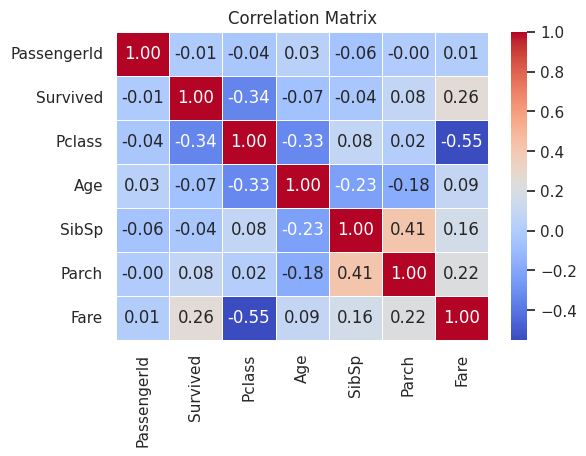

In [107]:
corr_matrix = titanic_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [108]:
import seaborn as sns
sns.set()


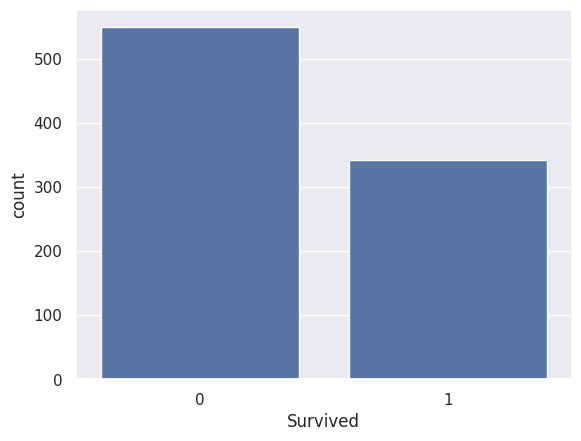

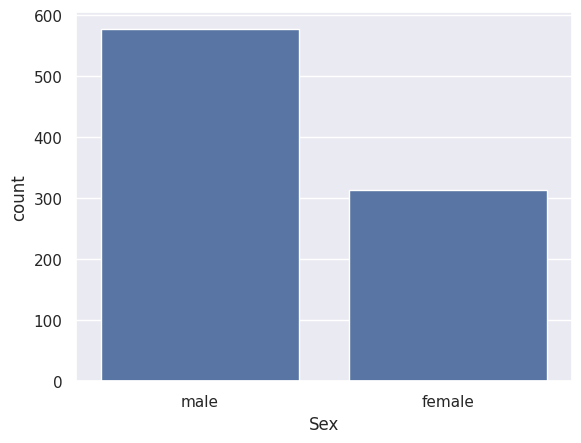

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming titanic_data is your DataFrame containing the data
sns.countplot(x='Survived', data=titanic_data)
plt.show()
sns.countplot(x='Sex', data=titanic_data)
plt.show()


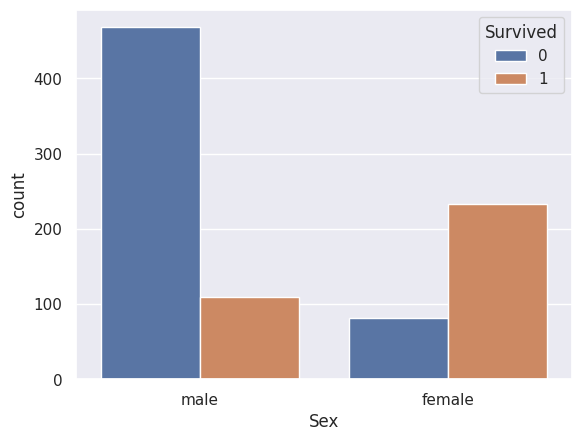

In [110]:
sns.countplot(x='Sex',hue='Survived',data=titanic_data)
plt.show()
#no of female who survived is more than male

In [111]:
#Encoding categorical data
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [112]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [113]:
#Separating features and target
X=titanic_data.drop(['Name','PassengerId','Survived','Ticket'],axis=1)
Y=titanic_data['Survived']


In [114]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [115]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [116]:
#splitting the data into train and test data set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [117]:
print(X_train.shape)

(712, 7)


In [118]:
print(X_test.shape)

(179, 7)


In [119]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
581,1,1,39.000000,1,1,110.8833,1
625,1,0,61.000000,0,0,32.3208,0
125,3,0,12.000000,1,0,11.2417,1
691,3,1,4.000000,0,1,13.4167,1
693,3,0,25.000000,0,0,7.2250,1
...,...,...,...,...,...,...,...
765,1,1,51.000000,1,0,77.9583,0
150,2,0,51.000000,0,0,12.5250,0
645,1,0,48.000000,1,0,76.7292,1
619,2,0,26.000000,0,0,10.5000,0


In [120]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
613,3,0,29.699118,0,0,7.7500,2
534,3,1,30.000000,0,0,8.6625,0
89,3,0,24.000000,0,0,8.0500,0
858,3,1,24.000000,0,3,19.2583,1
392,3,0,28.000000,2,0,7.9250,0
...,...,...,...,...,...,...,...
28,3,1,29.699118,0,0,7.8792,2
557,1,0,29.699118,0,0,227.5250,1
241,3,1,29.699118,1,0,15.5000,2
674,2,0,29.699118,0,0,0.0000,0


In [121]:
Y_train.shape

(712,)

In [122]:
Y_test.shape

(179,)

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [124]:
model=LogisticRegression()

In [125]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [126]:
predictions = model.predict(X_test)

In [128]:
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8379888268156425


In [130]:
print("Classification Report:")
print(classification_report(Y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       111
           1       0.84      0.71      0.77        68

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [132]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [133]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [134]:
predictions = rf_classifier.predict(X_test)



In [136]:
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8212290502793296


In [138]:
print("Classification Report:")
print(classification_report(Y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       111
           1       0.78      0.74      0.76        68

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [140]:
decision_tree_model = DecisionTreeClassifier()

In [142]:
decision_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [143]:
predictions = decision_tree_model.predict(X_test)

In [145]:
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


In [147]:
print("Classification Report:")
print(classification_report(Y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       111
           1       0.79      0.66      0.72        68

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [148]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [163]:
svm_model = SVC(kernel='linear')

In [164]:
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [165]:
predictions = svm_model.predict(X_test)

In [166]:
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(Y_test, predictions))

Accuracy: 0.8659217877094972
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       111
           1       0.88      0.75      0.81        68

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.86       179



In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [168]:
linear_model = LinearRegression()

# Training the model
linear_model.fit(X_train, Y_train)

# Making predictions on the testing set
predictions = linear_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.12097367242585315
R^2 Score: 0.48647092763688926


In [169]:
threshold = 0.1  # For example, considering predictions within +/- 0.1 of true values as accurate

# Compute accuracy
accurate_predictions = sum(abs(predictions - Y_test) <= threshold)
total_predictions = len(Y_test)
accuracy = accurate_predictions / total_predictions
print("Accuracy:", accuracy)

Accuracy: 0.24581005586592178


In [170]:
#SVM - 86
predictions = svm_model.predict(X_test)
print(predictions)





[0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0]


In [172]:
#checking whether the given model works fine or not
X_new = np.array([3,0,22,1,0,7.2500,0])
# Reshape the input array to have a single sample with multiple features
X_new_reshaped = X_new.reshape(1, -1)

# Make predictions using the reshaped array
prediction = svm_model.predict(X_new_reshaped)

print("Prediction of survival: {}".format(prediction))

Prediction of survival: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
